## Method

- Import dataset (normal + jammer)
- 

### Conditions for packet to be anomaly

- Scores to look at
  - CF
  - SF
  - TX
  - SNR
  - RSSI
- The jammed packets are `NodeID=121`

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [103]:
normal = pd.read_csv("../../datasets/normal_dataset.csv")
jammer = pd.read_csv("../../datasets/jammer_dataset.csv")

data = pd.DataFrame(normal)
features = data[['RSSI', 'SNR']]
features = features.dropna()
print(features.shape)
features.head()



(99381, 2)


,RSSI,SNR
0,-123.147,3.35339
1,-128.269,-1.76860
2,-124.153,2.34693
3,-109.394,17.10600
4,-113.455,13.04460


In [104]:
n_estimators = 100
contaimination = 0.01
sample_size = 256

In [105]:
IF = IsolationForest(n_estimators=n_estimators, contamination=contaimination, max_samples=sample_size, random_state=42)
IF.fit(features)

,n_estimators,100
,max_samples,256
,contamination,0.01
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [106]:
data = data.loc[features.index].copy()
data['anomaly_score'] = IF.decision_function(features)
data['anomaly'] = IF.predict(features)

data['anomaly'].value_counts()

anomaly
 1    98393
-1      988
Name: count, dtype: int64

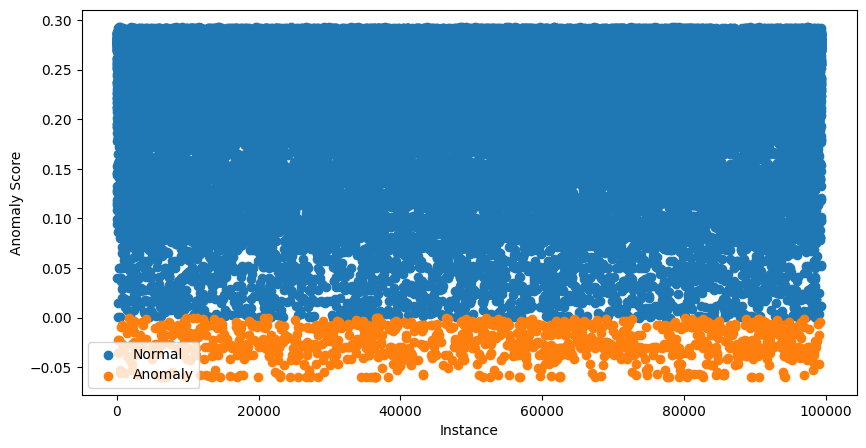

In [107]:
plt.figure(figsize=(10,5))
normal = data[data['anomaly'] == 1]
plt.scatter(normal.index, normal['anomaly_score'], label='Normal')
anomalies = data[data['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['anomaly_score'], label='Anomaly')
plt.xlabel("Instance")
plt.ylabel('Anomaly Score')
plt.legend()
plt.show()